# Pareto Distribution

In [1]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

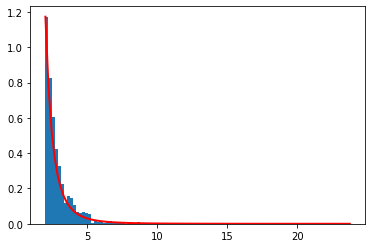

In [2]:
a, m = 3., 2.  # shape and mode
s = (np.random.pareto(a, 1000) + 1) * m

count, bins, _ = plt.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

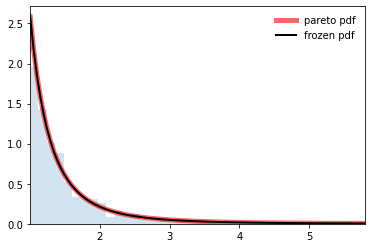

In [3]:
fig, ax = plt.subplots(1, 1)

b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')

x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

rv = pareto(b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = pareto.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))

r = pareto.rvs(b, size=1000)

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

# References

[1] https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html  
[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html   